In [267]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [268]:
# Get Data From CSV File
data=pd.read_csv("D:/Projects/Covid19/DataSet/covid_19_data.csv",parse_dates=['Last Update'])
# Rename Columns
data.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
# Display Data
data.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [269]:
data.shape

(7014, 8)

In [270]:
# Check for Data Types
data.dtypes

SNo                        int64
Date                      object
Province/State            object
Country                   object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
dtype: object

In [271]:
# Check for Null Values
data.isnull().sum().to_frame('nulls')

,nulls
SNo,0
Date,0
Province/State,2925
Country,0
Last Update,0
Confirmed,0
Deaths,0
Recovered,0


In [272]:
# Refrences=(Keggale - https://www.kaggle.com/abdulrhmanalosman/covid-19-analysis-visualization-prediction)

dataFrame = data.groupby(["Date", "Country"])[['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
# Get All the Confiremd Cases all arounfd the world
Confirmed_patients=dataFrame.sort_values('Confirmed',ascending=False)
Confirmed_patients=Confirmed_patients.drop_duplicates('Country')

world_Total_Confirmed=Confirmed_patients['Confirmed'].sum()  #Total Confirmed Patients
world_Total_Deaths=Confirmed_patients['Deaths'].sum()        #Total Deaths
world_Total_Recovered=Confirmed_patients['Recovered'].sum()  #Total Recovered Patients
 
world_Deaths_Rate=(world_Deaths_Total*100)/world_Confirmed_Total           #Get Death Precentage of the World
world_Recovered_rate=(world_Recovered_Total*100)/world_Confirmed_Total    #Get Recovered Precentage in the World

China=Confirmed_patients[Confirmed_patients['Country']=='Mainland China']        #Get Confirmed Patients precentage in china
China_Recovered_rate=(int(China['Recovered'].values)*100)/int(China['Confirmed'].values)  #Get Recovered Patients precentage in china

Italy=Confirmed_patients[Confirmed_patients['Country']=='Italy']        #Get confirmed Patients Precentage in Italy
Italy_Recovered_rate=(int(Italy['Recovered'].values)*100)/int(Italy['Confirmed'].values)  #GEt Recovered Patients Precentage in Italy 

SriLanka=Confirmed_patients[Confirmed_patients['Country']=='Sri Lanka']        #Get Confirmed Patients Percentage in sri lanka
SriLanka_Recovered_rate=(int(SriLanka['Recovered'].values)*100)/int(SriLanka['Confirmed'].values)  #Get Recovered patients Precentage in Sri Lanka

#Add Values to the Table and Display Table
Table={'Total Confirmed Patients in the World : ':world_Total_Confirmed,'Total Deaths Confirmed in the world : ':world_Total_Deaths,'Total Recovered Patients in the world : ':world_Total_Recovered,'Rate of Recovered Patients(Precentage) :':world_Recovered_rate,'Rate of Death Patients(Precentage) :':world_Deaths_Rate,
      'Rate of Recovered China cases(Presentage) :':China_Recovered_rate,'Rate of Recovers Italy Cases(Precentage) : ':Italy_Recovered_rate,'Rate of Recovers in Sri Lankan Cases(Precentage) : ':SriLanka_Recovered_rate}
Table=pd.DataFrame.from_dict(Table,orient='index',columns=['Total'])

Table.style.background_gradient(cmap='Reds')

,Total
Total Confirmed Patients in the World :,242810.000000
Total Deaths Confirmed in the world :,9866.000000
Total Recovered Patients in the world :,84963.000000
Rate of Recovered Patients(Precentage) :,34.991557
Rate of Death Patients(Precentage) :,4.063259
Rate of Recovered China cases(Presentage) :,87.024749
Rate of Recovers Italy Cases(Precentage) :,10.820032
Rate of Recovers in Sri Lankan Cases(Precentage) :,5.000000


Text(0.5, 1.0, 'Covid 19 Data Analysis')

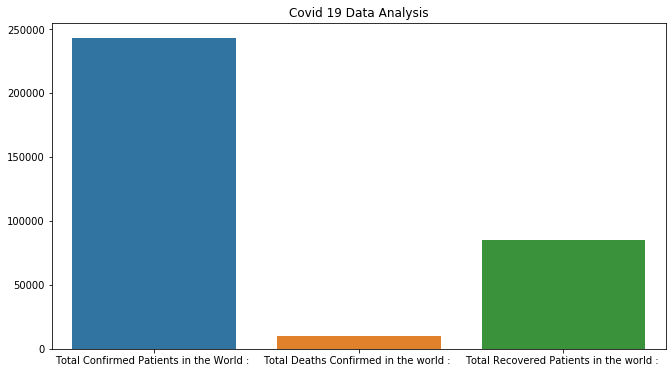

In [273]:
# Display Total Confirmed Patients/Deaths and Recovered
Graph=Table.head(3)
x=Graph.index
y=Graph['Total'].values
plt.rcParams['figure.figsize'] = (11,6)
sns.barplot(x,y,order=x ).set_title('Covid 19 Data Analysis') 

In [274]:
Recovered_rate=(Confirmed_patients['Recovered']*100)/Confirmed_patients['Confirmed']  #Get Recovered Precentage
Deaths_rate=(Confirmed_patients['Deaths']*100)/Confirmed_patients['Confirmed']  #Get Death Precentage
cases_rate=(Confirmed_patients.Confirmed*100)/world_Total_Confirmed    #Get Total Patients Confirmed

#Set Rated to the Table
Confirmed_patients['Recovered Patients Rate']=pd.DataFrame(Recovered_rate)  
Confirmed_patients['Deaths Patients Rate']=pd.DataFrame(Deaths_rate)
Confirmed_patients['Total Patients Rate']=pd.DataFrame(cases_rate)

# Display Table
Confirmed_patients.head(100).style.background_gradient(cmap='Blues')

,Date,Country,Confirmed,Deaths,Recovered,Recovered Patients Rate,Deaths Patients Rate,Total Patients Rate
3323,03/19/2020,Mainland China,80931.000000,3245.000000,70430.000000,87.024749,4.009588,33.331000
3305,03/19/2020,Italy,41035.000000,3405.000000,4440.000000,10.820032,8.297795,16.900045
3301,03/19/2020,Iran,18407.000000,1284.000000,5710.000000,31.020807,6.975607,7.580825
3374,03/19/2020,Spain,17963.000000,830.000000,1107.000000,6.162668,4.620609,7.397965
3284,03/19/2020,Germany,15320.000000,44.000000,113.000000,0.737598,0.287206,6.309460
3390,03/19/2020,US,13680.000000,200.000000,108.000000,0.789474,1.461988,5.634035
3279,03/19/2020,France,10886.000000,243.000000,12.000000,0.110233,2.232225,4.483341
3373,03/19/2020,South Korea,8565.000000,91.000000,1540.000000,17.980152,1.062464,3.527449
3379,03/19/2020,Switzerland,4075.000000,41.000000,15.000000,0.368098,1.006135,1.678267
3389,03/19/2020,UK,2716.000000,138.000000,67.000000,2.466863,5.081001,1.118570


In [290]:
# Function for get Each Contry's Covid-19 Active and confirmed and recoverd cases

def casesInEachCountry(country):
    data_of_country = data[data['Country']==country]  #Get Data of the given Country
    table = data_of_country.drop(['SNo','Province/State','Last Update'], axis=1)  #Drop unwanted Columns
    table['ActiveCases'] = table['Confirmed'] - table['Recovered'] - table['Deaths']  #Calculate Active Cases in the country
#     Display ActiveCases , Confiremd,recovered and Deaths in each country
    graph = pd.pivot_table(table,values=['ActiveCases','Confirmed', 'Recovered','Deaths'],index=['Date'], aggfunc=np.sum)
    
    return  graph.plot().set_title(country+" Covid 19 Data Analysis") 

Text(0.5, 1.0, 'Mainland China Covid 19 Data Analysis')

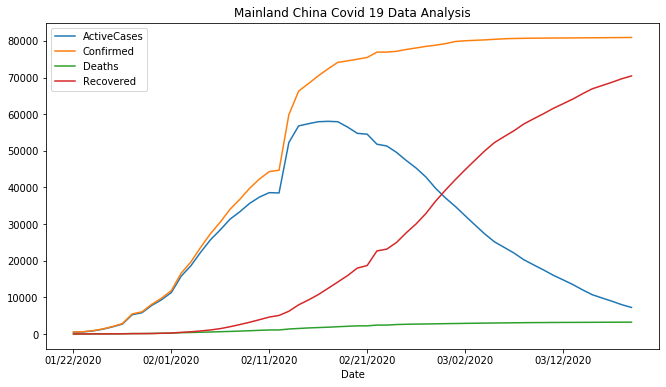

In [291]:
casesInEachCountry('Mainland China')

Text(0.5, 1.0, 'Italy Covid 19 Data Analysis')

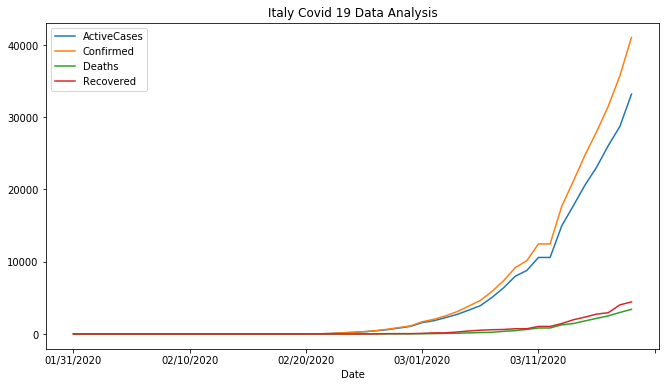

In [292]:
 casesInEachCountry('Italy')

Text(0.5, 1.0, 'Sri Lanka Covid 19 Data Analysis')

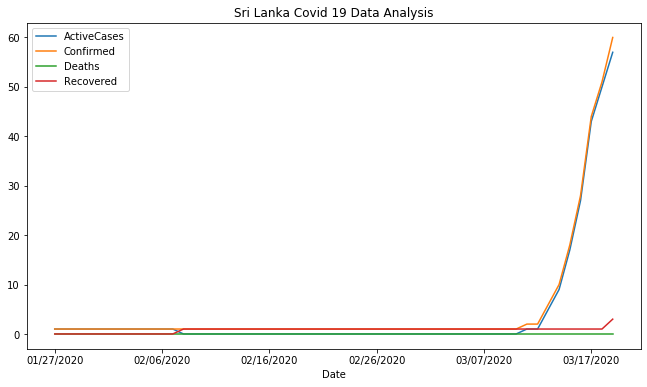

In [293]:
 casesInEachCountry('Sri Lanka')

Text(0.5, 1.0, 'Iran Covid 19 Data Analysis')

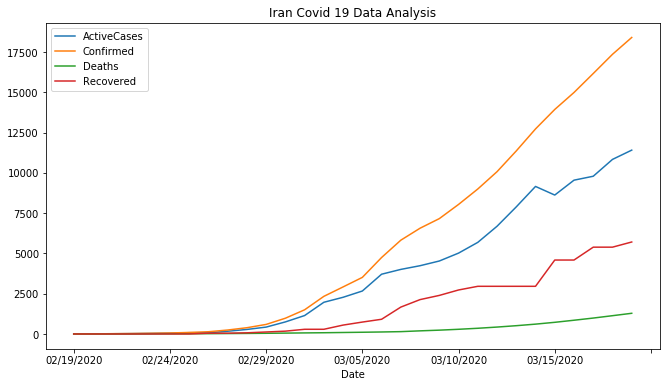

In [294]:
casesInEachCountry('Iran')